In [63]:
#importing library

#data analysis and visualizagtion   

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score

In [64]:
titanic = pd.read_csv('titanic-passengers.csv',sep=";") #data import

df = titanic.copy() #data copy

In [65]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [66]:
df.isnull().sum()  #find all missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [67]:
#replace missing Age values with median

df['Age'].fillna(df['Age'].mean(), inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [69]:
#Transform the object type values to numerical values(survived).
df.replace({'Survived':{'No':0,'Yes':1}}, inplace=True)


In [70]:
#Transform the object type values to numerical values(Sex).
df.replace({'Sex':{'male':0,'female':1}}, inplace=True)


In [71]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.000000,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.000000,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.000000,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,NaN,C
887,61,0,3,"Sirayanian, Mr. Orsen",0,22.000000,0,0,2669,7.2292,NaN,C
888,535,0,3,"Cacic, Miss. Marija",1,30.000000,0,0,315084,8.6625,NaN,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,29.699118,0,0,349215,7.8958,NaN,S


In [72]:
#drop the useless columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Embarked', 'Cabin', 'SibSp', 'Parch', 'Pclass'], axis=1)  


In [73]:
df

,Survived,Sex,Age,Fare
0,0,0,28.000000,13.0000
1,0,0,25.000000,7.6500
2,0,0,20.000000,7.8542
3,0,1,29.000000,21.0750
4,0,0,31.000000,52.0000
...,...,...,...,...
886,1,1,14.000000,30.0708
887,0,0,22.000000,7.2292
888,0,1,30.000000,8.6625
889,0,0,29.699118,7.8958


# Question 1 

In [74]:
#features extraction

x = df[['Age', 'Sex','Fare']]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)  #splitting data with test size of 20%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Precision={:.2f}".format(logreg.score(x_test, y_test)))


Precision=0.82


# Question 2

<AxesSubplot:xlabel='Predicted', ylabel='Survived'>

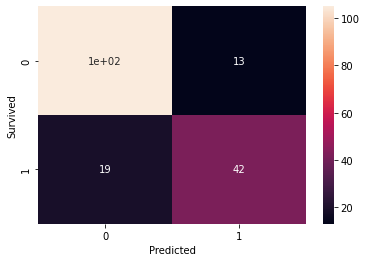

In [75]:
#confusion matrix

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Survived'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

# Question 4 

#ROC/AUC classification matrix

ROC (receiver operating characteristics) curve and AOC (area under the curve) are performance measures that provide a comprehensive evaluation of classification models.

ROC curve gives as an overview of model performance at different threshold values. AUC is the area under ROC curve between (0,0) and (1,1) which can be calculated using integral calculus. AUC basically aggregates the performance of the model at all threshold values. The best possible value of AUC is 1 which indicates a perfect classifier. AUC is zero if all the predictions are wrong.

In [86]:
#confusion matrix ROC AUX
clf = LogisticRegression(solver="liblinear", random_state=0).fit(x_train, y_train)
roc_auc_score(y_train, clf.predict_proba(x_train)[:, 1])
roc_auc_score(y_train, clf.decision_function(x_train))

0.8225388280172734

<AxesSubplot:xlabel='Predicted', ylabel='Survived'>

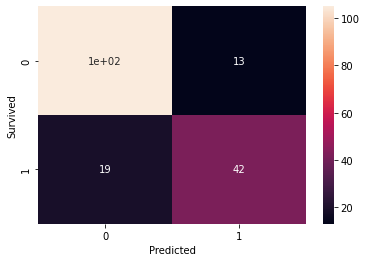

In [87]:
sns.heatmap(confusion_matrix, annot=True)